# Tips 
* import pdb; pdb.set_trace(): use this code to debug the python.(https://docs.python.org/2/library/pdb.html)
* [in progress]use the latex to record the used math function
* [in progress]add button to modify the parameter

# Try to display a ball with python

**This is a simple render process, using the norm dot light direct to calculate the light and implement the half lambert model to make it more nature**

ps.If you find there is a little bit white slice on the dark side of the ball, this means you forget to set the alpha to 1, so the transparent feature make it a wrong white slice

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#function def
#static variable:
#img,tex
#lightDirect
#r out u v
def get_color(x,y):
    #calculaten norm
    norm=(x,y,np.sqrt(np.square(r)-(np.square(x)+np.square(y))))
    #dot(norm,light)
    #cos(a)*0.5+0.5
    out=np.dot(norm,lightDirect)/(np.sqrt(np.dot(norm,norm))*np.sqrt(np.dot(lightDirect,lightDirect)))*0.5+0.5
    return out
def get_texture(x,y,u,v):
    #get size of texture png file
    lenTex=len(tex[0])
    highTex=len(tex)
    out=tex[u+x][v+y]
    return out
    

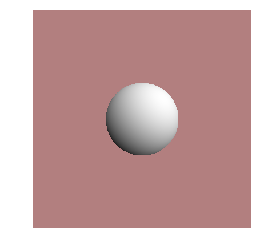

In [2]:
#const def
img = mpimg.imread('testImage.png')
lightDirect=(-1,1,1)
#lightDirect=(0,0,1)
r=100
out=0
originColor=[1,1,1,1]

#render process
for i in range(0,599):
    for j in range(0,599):
        if np.square(i-300)+np.square(j-300)<=np.square(100):
            #calculate ball color
            img[i][j]=np.multiply(originColor,get_color(i-300,j-300))
        else:
            #background color
            img[i][j]=[0.7,0.5,0.5,1]
        img[i][j][3]=1
plt.axis('off')
imgplot = plt.imshow(img)

# The following part of code try to implement textrue with the testTexture.png to make the Ball attach with texture
From this part the texture is not properly set to conform the perspective deformation

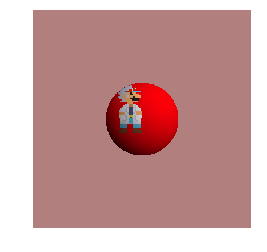

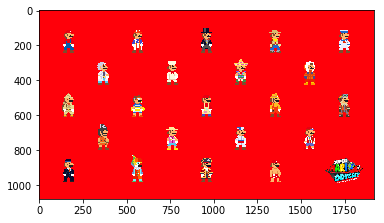

In [7]:
#const def
tex = mpimg.imread('testTexture.png')
img = mpimg.imread('testImage.png')
lightDirect=(-1,1,1)
#lightDirect=(0,0,1)
r=100
out=0
originColor=[1,1,1,1]
#U V is the start point on the texutre, shold be less than the tex length and height
texU=90
texV=100
#render process
for i in range(0,599):
    for j in range(0,599):
        if np.square(i-300)+np.square(j-300)<=np.square(100):
            #calculate ball cholor
            img[i][j]=np.multiply(np.append(get_texture(i,j,texU,texV),1),get_color(i-300,j-300))
        else:
            #background color
            img[i][j]=[0.7,0.5,0.5,1]
        img[i][j][3]=1

#show the picture and texture
plt.figure(1)
plt.axis('off')
imgplot = plt.imshow(img)
plt.figure(2)
imgplot2= plt.imshow(tex)